In [1]:
import psi4

import pdft
from cubeprop import Cube

import pandas as pd
import qcelemental as qc
import numpy as np
import numpy_html
import matplotlib.pyplot as plt

# PDFT Examples when target $n(r)$ is available

--------------------------------------------------------------------------------------
#                      <center>$Be_2$ Closed-Shell</center>    
--------------------------------------------------------------------------------------

In [2]:
#First Fragment
f1_geometry = psi4.geometry("""
0 1
@Be 0.0 0.0 0.0
Be 0.0 0.0 4.52
symmetry c1
unit bohr
""")
f1_geometry.set_name("Beryllium 1")

#Second Fragment
f2_geometry = psi4.geometry("""
0 1
Be 0.0 0.0 0.0
@Be 0.0 0.0 4.52
symmetry c1
unit bohr
""")
f2_geometry.set_name("Beryllium 2")

#Full Molecule
mol_geometry = psi4.geometry("""
0 1
Be 0.0 0.0 0.0
Be 0.0 0.0 4.52
symmetry c1
unit bohr
""")
mol_geometry.set_name("Be2")

#Psi4 Options:
psi4.set_options({'DFT_SPHERICAL_POINTS': 110,
                  'DFT_RADIAL_POINTS':    5,
                  'REFERENCE' : 'RKS'})

psi4.set_options({'cubeprop_tasks' : ['density'], 
                 'cubic_grid_spacing' : [0.1, 0.1, 0.1]})

energy, wfn = psi4.energy("SVWN/aug-cc-pVDZ", molecule=mol_geometry, return_wfn=True)

#Make fragment calculations:
f1  = pdft.Molecule(f1_geometry,  "aug-cc-pVDZ", "SVWN")
f2  = pdft.Molecule(f2_geometry,  "aug-cc-pVDZ", "SVWN")
mol = pdft.Molecule(mol_geometry, "aug-cc-pVDZ", "SVWN")


#Start a pdft systemm, and perform calculation to find vp
be2 = pdft.Embedding([f1, f2], mol)
vp = be2.find_vp(0.001, maxiter=40, atol=4e-5)

Iteration: 0 Delta_E = -0.0013275338023461813 Delta_D = -0.01837365780644795


(81, 81, 127)


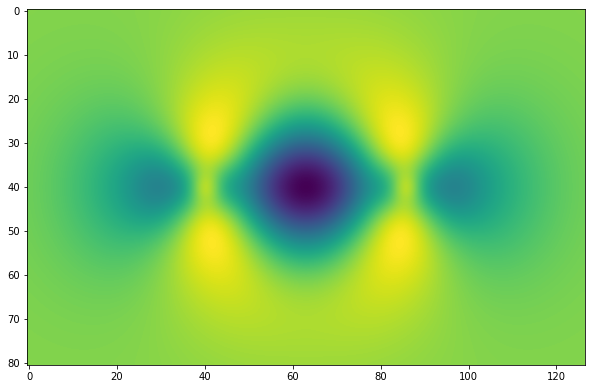

In [3]:
vp_plot = Cube(wfn)
vp_plot.plot_matrix(vp,1,35)

In [4]:
mol.get_plot()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

<Molecule(name='Be2' formula='Be2' hash='60e555c')>

In [5]:
be2.get_energies()

,Beryllium 1,Beryllium 2,Be2
Core,-19.045633,-19.045633,-45.086902
Hartree,7.139263,7.139263,17.761577
Exchange Correlation,-2.684192,-2.684192,-5.394435
Nuclear Repulsion,0.000000,0.000000,3.539823
Total Energy,-14.590699,-14.590699,-29.180071


--------------------------------------------------------------------------------------
#                      <center> $Li_2$ Open-Shell</center>    
--------------------------------------------------------------------------------------

In [6]:
#First Fragment
f1_geometry = psi4.geometry("""
0 2
@Li 0.0 0.0 0.0
Li 0.0 0.0 4.52
symmetry c1
unit bohr
""")
f1_geometry.set_name("Lithium 1")

#Second Fragment
f2_geometry = psi4.geometry("""
0 2
Li 0.0 0.0 0.0
@Li 0.0 0.0 4.52
symmetry c1
unit bohr
""")
f2_geometry.set_name("Lithium 2")

#Full Molecule
mol_geometry = psi4.geometry("""
0 1
Li 0.0 0.0 0.0
Li 0.0 0.0 4.52
symmetry c1
unit bohr
""")
mol_geometry.set_name("Li2")

#Psi4 Options:
psi4.set_options({'DFT_SPHERICAL_POINTS': 110,
                  'DFT_RADIAL_POINTS':    5,
                  'REFERENCE' : 'UKS'})

psi4.set_options({'cubeprop_tasks' : ['density'], 
                 'cubic_grid_spacing' : [0.1, 0.1, 0.1]})

energy_2, wfn_2 = psi4.energy("SVWN/cc-pVDZ", molecule=mol_geometry, return_wfn=True)

#Make fragment calculations:
f1  = pdft.U_Molecule(f1_geometry,  "cc-pVDZ", "SVWN")
f2  = pdft.U_Molecule(f2_geometry,  "cc-pVDZ", "SVWN")
mol = pdft.U_Molecule(mol_geometry, "cc-pVDZ", "SVWN")

energy_2, wfn_2 = psi4.energy("SVWN/cc-pVDZ", molecule=mol_geometry, return_wfn=True)

#Start a pdft systemm, and perform calculation to find vp
li2 = pdft.U_Embedding([f1, f2], mol)
vp = li2.find_vp(0.001, maxiter=9, atol=1e-5)

Iteration: 0 Delta_E = -0.11494056997540092 Delta_D = 1.0128520913402799
Iteration: 1 Delta_E = -0.11354271796789384 Delta_D = 0.8863544498062197
Iteration: 2 Delta_E = -0.10855482203530009 Delta_D = 0.7536920801411622
Iteration: 3 Delta_E = -0.1055385537977358 Delta_D = 0.7042530547985448
Iteration: 4 Delta_E = -0.10301806355405141 Delta_D = 0.6693848270921485
Iteration: 5 Delta_E = -0.10063271677556074 Delta_D = 0.6398445143944036
Iteration: 6 Delta_E = -0.09821877157087222 Delta_D = 0.6117933682536885
Iteration: 7 Delta_E = -0.09574641096835457 Delta_D = 0.5828578900091532
Iteration: 8 Delta_E = -0.09338094634698457 Delta_D = 0.5514414769744889
Iteration: 9 Delta_E = -0.09143268230564949 Delta_D = 0.5178619913467823


(81, 81, 127)


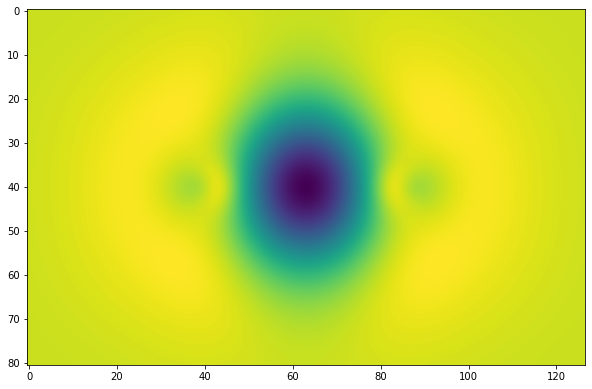

In [7]:
vp_plot = Cube(wfn_2)
vp_plot.plot_matrix(vp[2],1,35)

In [8]:
li2.get_energies()

,Lithium 1,Lithium 2,Li2
Core,-9.826061,-9.826061,-24.298304
Hartree,4.262255,4.262255,11.526268
Exchange Correlation,-1.773628,-1.773628,-3.779044
Nuclear Repulsion,0.000000,0.000000,1.991150
Total Energy,-7.337435,-7.337435,-14.559929


--------------------------------------------------------------------------------------
#                      <center> Water Dimer </center>    
--------------------------------------------------------------------------------------

In [22]:
#First Fragment
f1_geometry = psi4.geometry("""
0 1
@O       -1.464   0.099   0.300
@H       -1.956   0.624  -0.340
@H       -1.797  -0.799   0.206
O        1.369   0.146  -0.395
H        1.894   0.486   0.335
H        0.451   0.165  -0.083
symmetry c1
unit bohr
""")
f1_geometry.set_name("H20_1")

#Second Fragment
f2_geometry = psi4.geometry("""
0 1
O       -1.464   0.099   0.300
H       -1.956   0.624  -0.340
H       -1.797  -0.799   0.206
@O        1.369   0.146  -0.395
@H        1.894   0.486   0.335
@H        0.451   0.165  -0.083
symmetry c1
unit bohr
""")
f2_geometry.set_name("H20_2")

#Full Molecule
mol_geometry = psi4.geometry("""
0 1
O       -1.464   0.099   0.300
H       -1.956   0.624  -0.340
H       -1.797  -0.799   0.206
O        1.369   0.146  -0.395
H        1.894   0.486   0.335
H        0.451   0.165  -0.083
symmetry c1
unit bohr
""")
mol_geometry.set_name("Water Dimer")

#Psi4 Options:
psi4.set_options({'DFT_SPHERICAL_POINTS': 110,
                  'DFT_RADIAL_POINTS':    5,
                  'REFERENCE' : 'RKS'})

psi4.set_options({'cubeprop_tasks' : ['density'], 
                 'cubic_grid_spacing' : [0.1, 0.1, 0.1]})

energy_3, wfn_3 = psi4.energy("SVWN/cc-pVDZ", molecule=mol_geometry, return_wfn=True)

#Make fragment calculations:
f1  = pdft.Molecule(f1_geometry,  "cc-pVDZ", "SVWN")
f2  = pdft.Molecule(f2_geometry,  "cc-pVDZ", "SVWN")
mol = pdft.Molecule(mol_geometry, "cc-pVDZ", "SVWN")


#Start a pdft systemm, and perform calculation to find vp
h20_2 = pdft.Embedding([f1, f2], mol)
vp = h20_2.find_vp(0.001, maxiter=5, atol=1e-5)

Iteration: 0 Delta_E = -0.3039191968869659 Delta_D = -0.6374251311603949
Iteration: 1 Delta_E = -0.3040601641291687 Delta_D = -0.6351947723267095
Iteration: 2 Delta_E = -0.3042010449421184 Delta_D = -0.6328858549516205
Iteration: 3 Delta_E = -0.3043414668364903 Delta_D = -0.6304929926054559
Iteration: 4 Delta_E = -0.30448110087445457 Delta_D = -0.6280116763684234
Iteration: 5 Delta_E = -0.3046196571779376 Delta_D = -0.6254381649053506


In [24]:
h20_2.get_energies()

,H20_1,H20_2,Water Dimer
Core,-133.361229,-133.324729,-335.347078
Hartree,51.131696,51.050089,136.887088
Exchange Correlation,-7.429348,-7.388362,-15.043269
Nuclear Repulsion,17.222371,17.273224,68.980430
Total Energy,-72.436538,-72.389737,-144.522356


In [25]:
vp_plot = Cube(wfn_3)

(120, 96, 89)


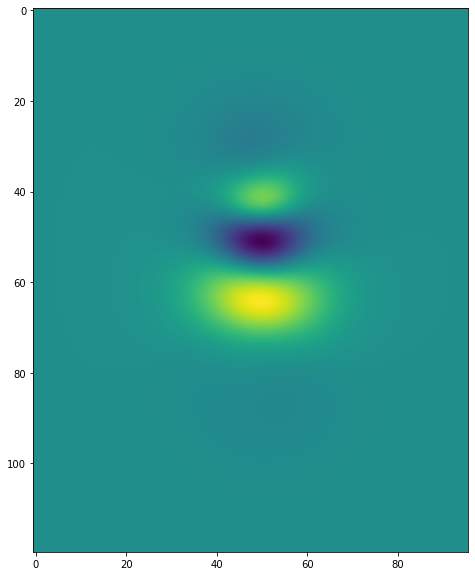

In [28]:
vp_plot.plot_matrix(vp, 2,60)